In [1]:
!pip install japanize-matplotlib
import japanize_matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime

     |████████████████████████████████| 4.1MB 8.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=b3087903a94960986681531630eef56270342dddb5eb799acb3dca8b37b160ce
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [2]:
fname = "https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv"
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月" , "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数", "退院数", "死亡数", "実効再生産数"]

for c in jp_df.columns:
  if c in ["都道府県", "Pref"]:
    jp_df[c] = jp_df[c].astype(str)
  elif c in ["実効再生産数"]:
    jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') 
    jp_df[c] = jp_df[c].fillna(0)
    jp_df[callable] = jp_df[c].astype(float)
  else:
    jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce')
    jp_df[c] = jp_df[c].fillna(0)
    jp_df[c] = jp_df[c].astype(int)

jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
jp_df = jp_df.set_index(["Pref", "年月日"])

def fancy_ax(ax):
 ax.xaxis.set_major_locator(mdates.MonthLocator()) 
 ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))
 ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5)
 plt.setp(ax.get_xticklabels(which='major'))
 return ax

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

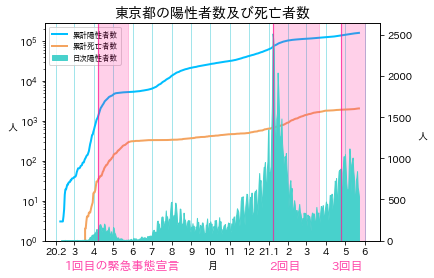

In [3]:
pref = "Tokyo"
pref_df = jp_df.loc[pref]
pos = pref_df["陽性数"]
tes = pref_df["検査数"]
ser = pref_df["重症数"]
dea = pref_df["死亡数"]
hos = pref_df["入院数"]

fig, ax1 = plt.subplots()
ax1.plot(pos, color='deepskyblue', linewidth=2, label="累計陽性者数")
ax1.plot(dea, color='sandybrown', linewidth=2, label="累計死亡者数")
ax1.set_xlabel("月")
ax1.set_yscale('log')
ax1.set_ylabel("人", labelpad=7, rotation=0)
ax1.set_ylim(1,)
ax2 = plt.twinx(ax1)
ax2.fill_between(pos.index, pos.diff(), color='mediumturquoise', label="日次陽性者数")
ax2.set_ylabel("人", labelpad=10, rotation=0)
ax2.set_ylim(0,)
ax1 = fancy_ax(ax1)
ax1.set_xticklabels([20.2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 21.1, 2, 3, 4, 5, 6])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left', prop={'size':7.5})
plt.title(pref_df["都道府県"][0] + "の陽性者数及び死亡者数", size=14)

emr1_start = datetime.datetime(2020,4,7)
emr1_end = datetime.datetime(2020,5,25)
emr2_start = datetime.datetime(2021,1,7)
emr2_end = datetime.datetime(2021,3,21)
emr3_start = datetime.datetime(2021,4,25)
emr3_end = datetime.datetime(2021,6,1)
plt.vlines(emr1_start, 0, 200000,  "deeppink", linewidth=1.2, linestyle='-', alpha=0.7)
plt.axvspan(emr1_start, emr1_end, alpha=0.2, color='deeppink', zorder=0)
plt.vlines(emr2_start, 0, 200000, "deeppink", linewidth=1.2, linestyle='-', alpha=0.7)
plt.axvspan(emr2_start, emr2_end, alpha=0.2, color='deeppink', zorder=0)
plt.vlines(emr3_start, 0, 200000, "deeppink", linewidth=1.2, linestyle='-', alpha=0.7)
plt.axvspan(emr3_start, emr3_end, alpha=0.2, color='deeppink', zorder=0)
ax1.text(0.06, -0.13, "1回目の緊急事態宣言", transform=ax1.transAxes, color='deeppink', fontsize=12, alpha=0.8)
ax1.text(0.67, -0.13, "2回目", transform=ax1.transAxes, color='deeppink', fontsize=12, alpha=0.8)
ax1.text(0.856, -0.13, "3回目", transform=ax1.transAxes, color='deeppink', fontsize=12, alpha=0.8)

fig.savefig("C1TB1137_japan-01.pdf", bbox_inches="tight")

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

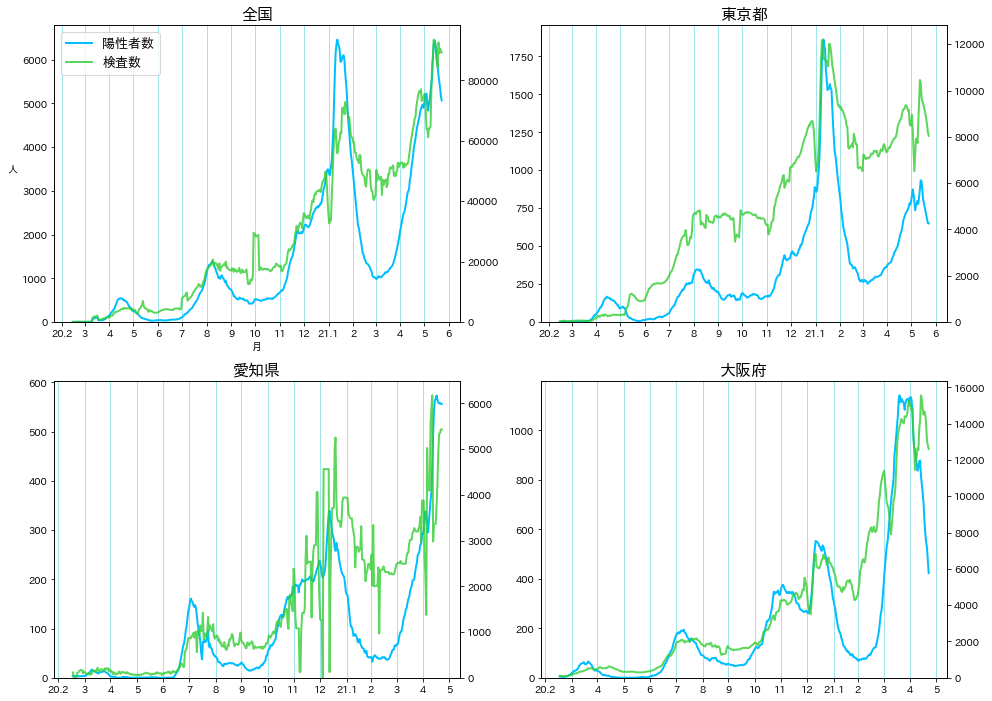

In [6]:
pref_set = ["全国", "Tokyo", "Aichi", "Osaka"] 
W = 7
cols = 2
rows = np.ceil(len(pref_set)/cols) 
fig = plt.figure( figsize=(8*cols, 6*rows) )

for (pid, pref) in enumerate(pref_set): 
  if pref == "全国": 
    pref_df = jp_df.groupby("年月日").sum()
    pref_df["都道府県"] = "全国"
  else:
    pref_df = jp_df.loc[pref] 

  pos = pref_df["陽性数"] 
  tes = pref_df["検査数"]
  ser = pref_df["重症数"]
  dea = pref_df["死亡数"]
  hos = pref_df["入院数"] 
  spp = ser/pos
  ppt = pos/tes
        
  ax1 = fig.add_subplot(rows, cols, pid+1)
  ax1.plot(pos.diff().rolling(W).mean(), color='deepskyblue', linewidth=2, label="陽性者数")
  ax2 = plt.twinx(ax1)
  ax2.plot(tes.diff().rolling(W).mean(), color='limegreen', linewidth=2, alpha=0.8, label="検査数")
  ax1.set_ylim(0,)
  ax2.set_ylim(0,)
  ax1.set_title(pref_df["都道府県"][0], size=16)
  ax1 = fancy_ax(ax1)
  ax1.set_xticklabels([20.2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 21.1, 2, 3, 4, 5, 6])
  if pid == 0:
    ax1.set_xlabel("月")
    ax1.set_ylabel("人", labelpad=10, rotation=0)
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper left', prop={'size':13})

fig.savefig("C1TB1137_japan-02.pdf", bbox_inches="tight")

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

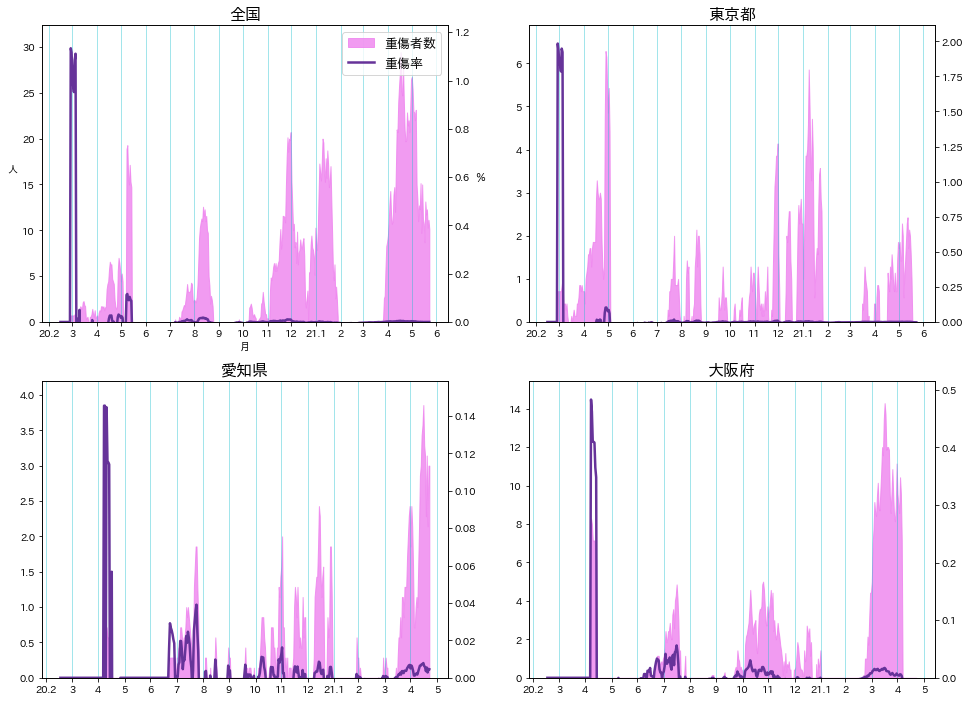

In [11]:
pref_set = ["全国", "Tokyo", "Aichi", "Osaka"] 
W = 7
cols = 2
rows = np.ceil(len(pref_set)/cols) 
fig = plt.figure( figsize=(8*cols, 6*rows) )

for (pid, pref) in enumerate(pref_set): 
  if pref == "全国": 
    pref_df = jp_df.groupby("年月日").sum()
    pref_df["都道府県"] = "全国"
  else:
    pref_df = jp_df.loc[pref] 

  pos = pref_df["陽性数"] 
  tes = pref_df["検査数"]
  ser = pref_df["重症数"]
  dea = pref_df["死亡数"]
  hos = pref_df["入院数"] 
  spp = (ser/pos)*100
  ppt = (pos/tes)*100
        
  ax1 = fig.add_subplot(rows, cols, pid+1)
  ax1.fill_between(ser.index, ser.diff().rolling(W).mean(), color='violet', linewidth=1, alpha=0.8, label="重傷者数")
  ax2 = plt.twinx(ax1)
  ax2.plot(spp.index, spp.diff().rolling(W).mean(), color='rebeccapurple', linewidth=2.5, label="重傷率")
  ax1.set_ylim(0,)
  ax2.set_ylim(0,)
  ax1.set_title(pref_df["都道府県"][0], size=16)
  ax1 = fancy_ax(ax1)
  ax1.set_xticklabels([20.2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 21.1, 2, 3, 4, 5, 6])
  if pid == 0:
    ax1.set_xlabel("月")
    ax1.set_ylabel("人", labelpad=10, rotation=0)
    ax2.set_ylabel("％", labelpad=10, rotation=0)
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc='upper right', prop={'size':13})
  
fig.savefig("C1TB1137_japan-03.pdf", bbox_inches="tight")